# Clustering and Regression

In [1]:
import numpy as np
import pandas as pd
import random

from sklearn.linear_model import LinearRegression
from sklearn.cluster import DBSCAN

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Colour the Clusters
def set_colors(labels, colors = "rgbykcm"):
    # In: labels = 
    # Out: array of colours for each given label
    colored_labels = []
    for label in labels:
        colored_labels.append(colors[label])
    return colored_labels

Now we generate some sample data.

In [3]:
## Create some synthetic data
from scipy.stats import multivariate_normal

np.random.seed(100)
data = []
# multivariate_normal generates a multivariate normal random variable
# creating two set of numbers with mean 0 and 0
# dist = multivariate_normal(mean = [0, 0], cov = [[0.5, 0.1], [0.0, 0.01]])
dist = multivariate_normal(mean = [0, 0], cov = [[0.5, 0.5], [0.0, 0.1]])
for i in range(150):
    # Add a random samples from a multivariate normal distribution
    data.append(dist.rvs())
print(data[0:5])

# creating two set of numbers with mean 1 and 5
# dist = multivariate_normal(mean = [1, 5], cov = [[0.5, 0.2], [0.0, 0.02]])
dist = multivariate_normal(mean = [1, 5], cov = [[0.5, 0.5], [0.0, 0.1]])
for i in range(150):
    data.append(dist.rvs())

# creating two set of numbers with mean 2 and 10
dist = multivariate_normal(mean = [2, 10], cov = [[0.5, 0.5], [0.0, 0.1]])
for i in range(150):
    data.append(dist.rvs())

# convert data into a dataframe
df = pd.DataFrame(data, columns = ["x1", "x2"])
df.head()

[array([-1.09746501, -0.98978384]), array([ 0.72823476,  0.64729093]), array([ 0.48168107,  0.68626104]), array([ 0.33321239, -0.06552218]), array([-0.16012673, -0.06673504])]


,x1,x2
0,-1.097465,-0.989784
1,0.728235,0.647291
2,0.481681,0.686261
3,0.333212,-0.065522
4,-0.160127,-0.066735


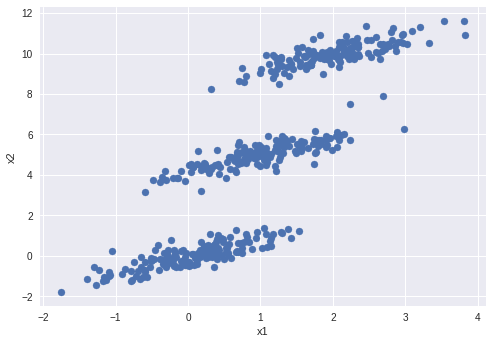

In [4]:
plt.scatter(df["x1"], df["x2"])
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## Find Clusters

In [5]:
# Fit a DBSCAN estimator
# create a DBScan Estimator
estimator = DBSCAN(eps = 0.8, min_samples = 10)
# Two input variables
X = df[["x1", "x2"]]
# Note that for UNsupervised methods there is no known output (y)
estimator.fit(X)

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
    min_samples=10, n_jobs=1, p=None)

In [6]:
# Clusters are given in the labels_ attribute
df["label"] = estimator.labels_
df["color"] = set_colors(df["label"])
df.head()

,x1,x2,label,color
0,-1.097465,-0.989784,0,r
1,0.728235,0.647291,0,r
2,0.481681,0.686261,0,r
3,0.333212,-0.065522,0,r
4,-0.160127,-0.066735,0,r


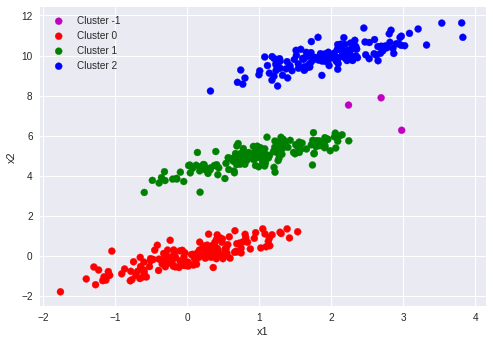

In [7]:
for i, cluster in df.groupby("label"):
    plt.scatter(cluster["x1"], cluster["x2"], c = cluster["color"], label = "Cluster %d" % i)
plt.legend(loc = "upper left")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## Add Cluster Labels back to the Data Frame and Fit a Linear Model

In [8]:
df = pd.concat([df, pd.get_dummies(df["label"], prefix = "cluster")], axis = 1)
df.head()

,x1,x2,label,color,cluster_-1,cluster_0,cluster_1,cluster_2
0,-1.097465,-0.989784,0,r,0,1,0,0
1,0.728235,0.647291,0,r,0,1,0,0
2,0.481681,0.686261,0,r,0,1,0,0
3,0.333212,-0.065522,0,r,0,1,0,0
4,-0.160127,-0.066735,0,r,0,1,0,0


In [9]:
model = LinearRegression()
X = df[["x1", "cluster_0", "cluster_1", "cluster_2"]]
y = df["x2"]
model.fit(X, y)
print(model.score(X, y))

0.992177297945


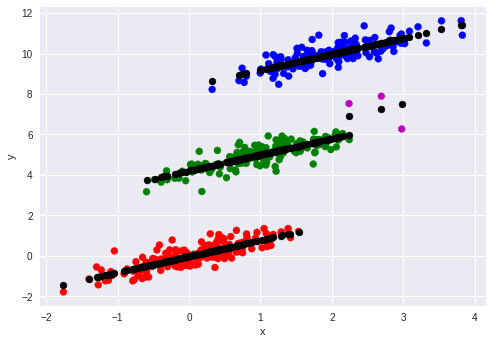

In [10]:
# Plot the model
plt.scatter(df["x1"], df["x2"], c = df["color"])
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(df["x1"], model.predict(X), color = "black")
plt.show()

## Another example

In [11]:
## Create some synthetic data
from scipy.stats import multivariate_normal

np.random.seed(200)
data = []
# dist = multivariate_normal(mean = [0, 0], cov = [[0.5, 0.1], [0.0, 0.01]])
dist = multivariate_normal(mean = [0, 0], cov = [[0.1, 0.5], [0.0, 0.2]])
for i in range(150):
    p = list(dist.rvs())
    data.append(dist.rvs())
dist = multivariate_normal(mean = [1, 5], cov = [[0.6, 0.0], [0.2, 0.1]])
for i in range(150):
    data.append(dist.rvs())
dist = multivariate_normal(mean = [2, 10], cov = [[0.5, 0.5], [0.0, 0.1]])
for i in range(150):
    data.append(dist.rvs())

df = pd.DataFrame(data, columns = ["x1", "x2"])
df.head()

,x1,x2
0,0.136516,0.510450
1,-0.117888,-0.145648
2,-0.236422,0.095908
3,0.341042,1.375214
4,-0.153667,-0.620797


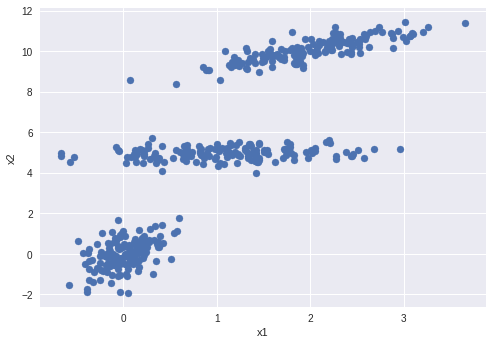

In [12]:
plt.scatter(df["x1"], df["x2"])
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [13]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps = 0.8, min_samples = 10)
X = df[["x1", "x2"]]
estimator.fit(X)

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
    min_samples=10, n_jobs=1, p=None)

In [14]:
# Clusters are given in the labels_ attribute
df["label"] = estimator.labels_
df["color"] = set_colors(df["label"])
df.head()

,x1,x2,label,color
0,0.136516,0.510450,0,r
1,-0.117888,-0.145648,0,r
2,-0.236422,0.095908,0,r
3,0.341042,1.375214,0,r
4,-0.153667,-0.620797,0,r


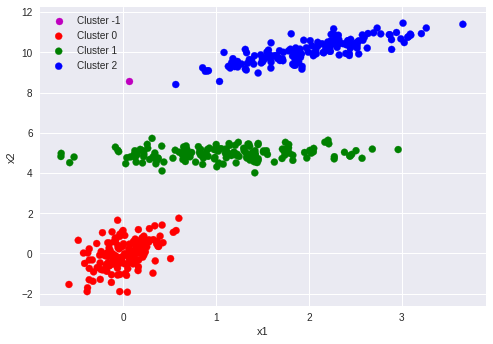

In [15]:
for i, cluster in df.groupby("label"):
    plt.scatter(cluster["x1"], cluster["x2"], c = cluster["color"], label = "Cluster %d" % i)
plt.legend(loc = "upper left")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## Modeling
This time we have to fit a model to each cluster since they are not the same shape with offsets.

In [16]:
from collections import Counter
counts = Counter(df["label"])
print(counts)

Counter({0: 150, 1: 150, 2: 149, -1: 1})


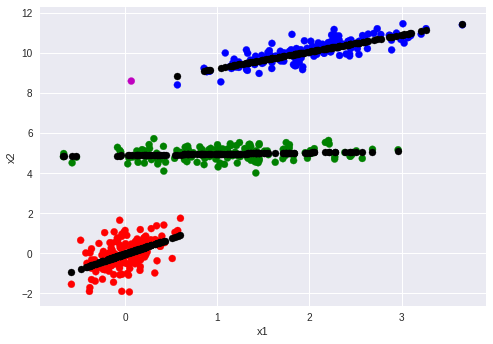

In [17]:
# Plot the raw data
plt.scatter(df["x1"], df["x2"], c = df["color"])
plt.xlabel("x1")
plt.ylabel("x2")

# Fit a model to each cluster
models = dict()
for label in set(df["label"]):
    if counts[label] > 10:
        model = LinearRegression()
        subdf = df[df["label"] == label]
        X = subdf[["x1"]]
        y = subdf[["x2"]]
        model.fit(X, y)
        models["label"] = model
        plt.scatter(X, model.predict(X), color = "black")
plt.show()